In [1]:
import pandas as pd

file_path = "combined_rows.csv"

data = pd.read_csv(file_path)


In [2]:
data

,Subject,White Matter,Grey Matter,CSF,Accumbens,Amygdala,Basal Forebrain,Caudate,Hippocampus,Pallidum,Putamen,Output
0,job1752083,25.45,48.02,26.53,0.03,0.10,NaN,0.55,0.41,NaN,0.70,AD
1,job1752082,26.32,47.82,25.86,0.03,0.10,NaN,0.55,0.40,NaN,0.69,AD
2,job1752081,23.58,49.39,27.03,0.03,0.10,NaN,0.55,0.40,NaN,0.67,AD
3,job1752079,25.51,47.87,26.61,0.03,0.11,NaN,0.55,0.40,NaN,0.68,AD
4,job1752078,28.29,44.59,27.12,0.03,0.08,NaN,0.40,0.50,NaN,0.53,AD
...,...,...,...,...,...,...,...,...,...,...,...,...
104,job1751863,25.70,52.94,21.36,0.03,0.13,NaN,0.53,0.54,NaN,0.63,MC
105,job1751864,26.50,52.38,21.12,0.03,0.13,NaN,0.54,0.53,NaN,0.69,MC
106,job1751865,24.90,53.43,21.67,0.03,0.14,NaN,0.56,0.53,NaN,0.70,MC
107,job1751866,27.39,51.89,20.72,0.04,0.13,NaN,0.52,0.54,NaN,0.69,MC


In [3]:
from sklearn.preprocessing import LabelEncoder
Output=LabelEncoder()
data['Output']=Output.fit_transform(data['Output'])

In [4]:
features_cols=['White Matter', 'Grey Matter',
                 'CSF']  #, 'Accumbens', 'Amygdala', 'Caudate', 'Hippocampus','Putamen']
X=data[features_cols]
Y=data['Output']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
from sklearn.svm import SVC

In [8]:
model=SVC(kernel='linear')

In [9]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [10]:
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [11]:
model.score(X_test,Y_test)

0.7272727272727273

Confusion Matrix:
[[14  1]
 [ 5  2]]


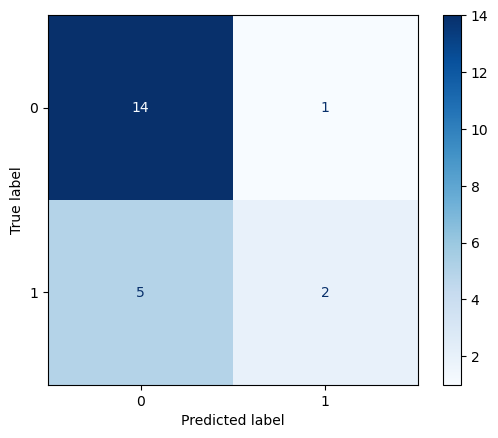

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example: True labels and predicted labels
true_labels = Y_test
predicted_labels = Y_pred

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Display the confusion matrix as a visual plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(true_labels))
disp.plot(cmap="Blues")

In [13]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(Y_train, model.predict(X_train))
test_accuracy=accuracy_score(Y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.84
Testing Accuracy: 0.73
